# Demonstration 3: Flight Initiation Distance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import FlightInitiationDistance
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Value Iteration

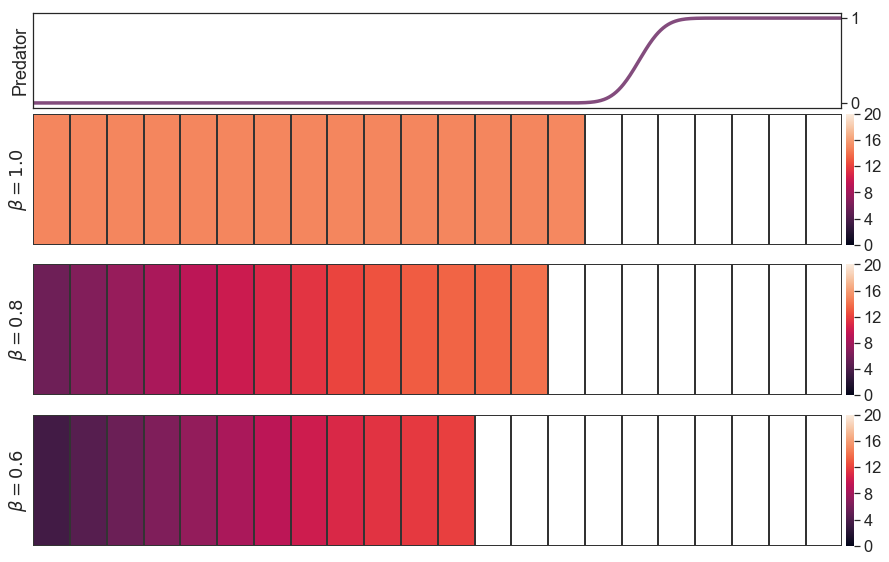

In [2]:
from sisyphus.mdp import ValueIteration
from scipy.stats import norm

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
betas = [1.0, 0.8, 0.6]

## Environment parameters.
runway = 20
mu = 15
sd = 0.5
shock = -100

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value Iteration.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment.
gym = FlightInitiationDistance(runway=runway, mu=mu, sd=sd, shock=shock)

V = np.zeros((len(betas), gym.n_states))
for i, beta in enumerate(betas):
    
    ## Initialize value iteration.
    qvi = ValueIteration(policy='betamax', gamma=1.0, beta=beta)
    
    ## Solve for Q-values.
    qvi  = qvi.fit(gym)
    
    ## Solve for state values.
    V[i] = qvi.V.copy()
    V[i,~np.isin(gym.states, qvi.pi[:-1])] = np.nan    # Mask states post-flight.

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize figure.
fig = plt.figure(figsize=(12,8))

## Initialize environment plot.
gs = gridspec.GridSpec(1,1)
gs.update(left=0.025, right=0.96, bottom=0.81, top=0.975, hspace=0.0, wspace=0.0)
ax = plt.subplot(gs[0])

## Plot environment.
x = np.linspace(0, runway, 1000)
ax.yaxis.tick_right()
ax.plot(x, norm(mu, sd).cdf(x), lw=3.5, color='#834c7d')
ax.set(xlim=(0, runway), xticks=[], ylim=(-0.06, 1.06), ylabel='Predator')

## Initialize state plots.
gs = gridspec.GridSpec(3,1)
gs.update(left=0.025, right=0.975, bottom=0.05, top=0.80, hspace=0.15, wspace=0.0)

for i, beta in enumerate(betas):
    
    ## Initialize canvas. 
    ax = plt.subplot(gs[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
        
    ## Plot state values.
    sns.heatmap(V[i].reshape(1,-1), vmin=0, vmax=runway, xticklabels=[], yticklabels=[],
                linewidths=1, linecolor='0.2', ax=ax, cbar_ax=cax)

    ## Clean up.
    ax.set(ylabel=r'$\beta = %0.1f$' %beta)
    
plt.savefig('figures/03_fid.png', dpi=180)